In [1]:
from sklearn.datasets import load_iris 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df = df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Kmeans 

[1 2 0]


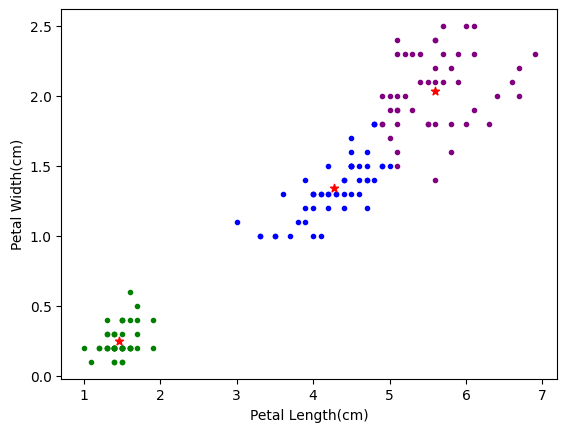

In [5]:
km = KMeans(n_clusters=3)
km.fit(df[['petal length (cm)', 'petal width (cm)']])
cluster_predicted = km.predict(df[['petal length (cm)', 'petal width (cm)']])

df['Cluster'] = cluster_predicted
print(df['Cluster'].unique())

c0 = df[df['Cluster']==0]
c1 = df[df['Cluster']==1]
c2 = df[df['Cluster']==2]

centroids = km.cluster_centers_

plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.scatter(c0['petal length (cm)'], c0['petal width (cm)'], marker='.', color='purple')
plt.scatter(c1['petal length (cm)'], c1['petal width (cm)'], marker='.', color='green')
plt.scatter(c2['petal length (cm)'], c2['petal width (cm)'], marker='.', color='blue')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='red')


Scaled Kmeans 

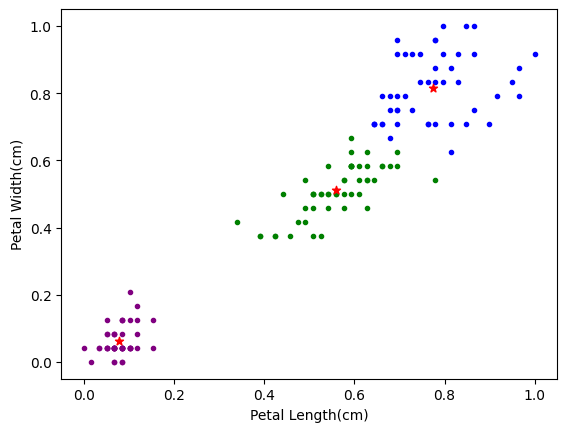

In [6]:
#Scaling 
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])



#Kmeans 
km = KMeans(n_clusters=3)
km.fit(df[['petal length (cm)' , 'petal width (cm)']])
cluster_predicted = km.predict(df[['petal length (cm)' , 'petal width (cm)']])

df['Cluster'] = cluster_predicted

c0 = df[df['Cluster']==0]
c1 = df[df['Cluster']==1]
c2 = df[df['Cluster']==2]

centroids = km.cluster_centers_

plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.scatter(c0['petal length (cm)'], c0['petal width (cm)'], marker='.', color='purple')
plt.scatter(c1['petal length (cm)'], c1['petal width (cm)'], marker='.', color='green')
plt.scatter(c2['petal length (cm)'], c2['petal width (cm)'], marker='.', color='blue')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='red')


Elbow Plot 

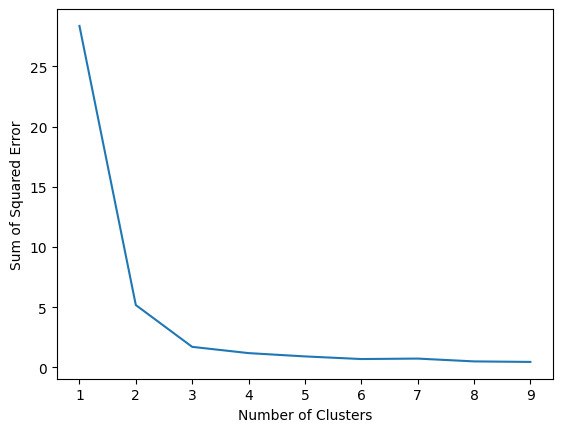

In [7]:
sse = []
k_range = range(1,10)

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)' , 'petal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)
    

Hence Optimal Number of Clusters(k)=3